In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a consistent style for the plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [7]:
# Load the transaction and customer data
transactions = pd.read_csv("C:\\Datasets\\transaction_data.csv")
purchase = pd.read_csv("C:\\Datasets\\purchase_behaviour.csv")

# Quick look at the data
print("Transactions Data:")
print(transactions.head())

print("\nPurchase Behavior:")
print(purchase.head())


Transactions Data:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  

Purchase Behavior:
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILI

In [8]:
# Check for missing values in each dataset
print("Missing values in Transactions:\n", transactions.isnull().sum())
print("\nMissing values in Customers:\n", purchase.isnull().sum())


Missing values in Transactions:
 DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Missing values in Customers:
 LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [9]:
# Aggregate total sales for each product
product_sales = transactions.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()


In [10]:
# Sort the products by total sales and select the top 3
top3_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)
print("Top 3 Most Profitable Products:")
print(top3_products)


Top 3 Most Profitable Products:
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


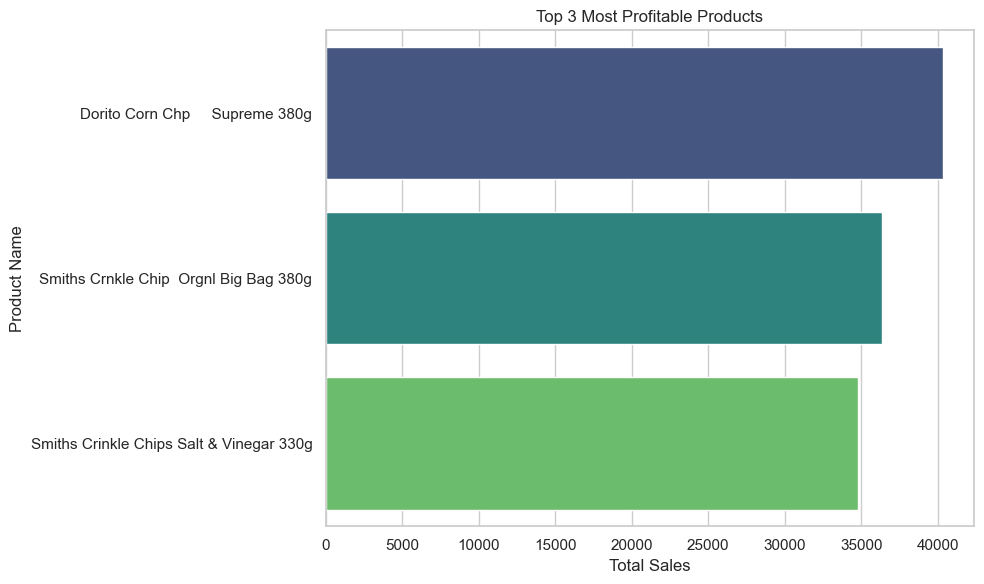

In [11]:
# Plot the top 3 products using a bar chart
sns.barplot(
    data=top3_products,
    x='TOT_SALES',
    y='PROD_NAME',
    palette="viridis"
)
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.tight_layout()  # This ensures that the layout looks neat
plt.show()


In [13]:
# Merge the two datasets
merged_df = pd.merge(transactions, , on='LYLTY_CARD_NBR', how='inner')
print("Merged Data Preview:")
print(merged_df.head())


Merged Data Preview:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43414          1            1307     346        96   
3  43533          1            1307     347        54   
4  43605          1            1343     383        61   

                                PROD_NAME  PROD_QTY  TOT_SALES  \
0  Natural Chip        Compny SeaSalt175g         2        6.0   
1                CCs Nacho Cheese    175g         3        6.3   
2          WW Original Stacked Chips 160g         2        3.8   
3                       CCs Original 175g         1        2.1   
4  Smiths Crinkle Cut  Chips Chicken 170g         2        2.9   

                LIFESTAGE PREMIUM_CUSTOMER  
0   YOUNG SINGLES/COUPLES          Premium  
1  MIDAGE SINGLES/COUPLES           Budget  
2  MIDAGE SINGLES/COUPLES           Budget  
3  MIDAGE SINGLES/COUPLES           Budget  
4  MIDAGE SING

In [14]:
# Create a summary of customer activity
loyalty_summary = merged_df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({
    'TOT_SALES': 'sum',
    'TXN_ID': 'count'
}).reset_index().rename(columns={'TXN_ID': 'Transaction_Count'})

# Identify the most loyal customers (e.g., based on the highest number of transactions)
loyal_customers = loyalty_summary.sort_values(by='Transaction_Count', ascending=False).head(10)
print("Top Loyal Customers:")
print(loyal_customers)

Top Loyal Customers:
       LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  \
42813          162039         OLDER FAMILIES       Mainstream      126.8   
45905          172032  YOUNG SINGLES/COUPLES       Mainstream      120.1   
3686            13138         YOUNG FAMILIES       Mainstream      109.0   
31654          116181         YOUNG FAMILIES          Premium      117.6   
34943          128178         OLDER FAMILIES       Mainstream       99.7   
60925          230078         OLDER FAMILIES           Budget      138.6   
28605          105026         YOUNG FAMILIES           Budget      114.2   
35061          129050         YOUNG FAMILIES          Premium       93.5   
29617          109036  OLDER SINGLES/COUPLES          Premium      113.0   
59107          222242         OLDER FAMILIES       Mainstream      109.2   

       Transaction_Count  
42813                 18  
45905                 18  
3686                  17  
31654                 17  
34943  

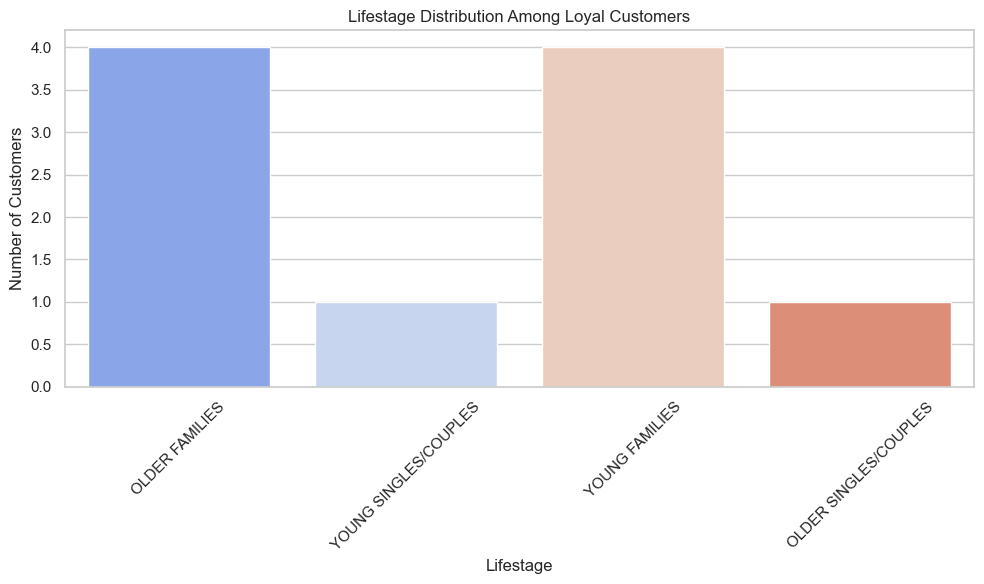

In [15]:
sns.countplot(
    data=loyal_customers,
    x='LIFESTAGE',
    palette="coolwarm"
)
plt.title("Lifestage Distribution Among Loyal Customers")
plt.xlabel("Lifestage")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

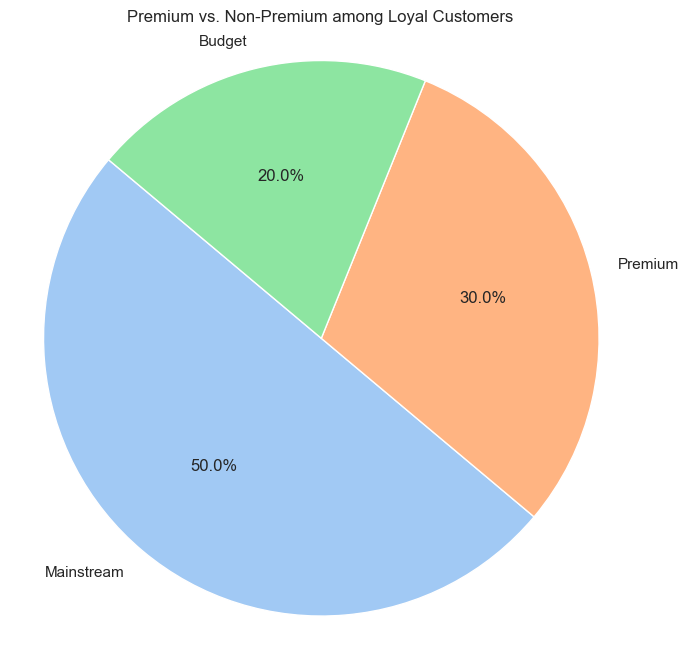

In [17]:
# Count premium vs non-premium in the loyal customer group
premium_counts = loyal_customers['PREMIUM_CUSTOMER'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    premium_counts,
    labels=premium_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title("Premium vs. Non-Premium among Loyal Customers")
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

# Extended section of analysis as there is a mention of product weight in the product name column, where we can draw more insights about the products

In [18]:
import re


In [19]:
# Function to extract weight from product name (e.g., "175g" or "380 gm")
def extract_weight(prod_name):
    """
    Extracts the weight (in grams) from the product name.
    """
    match = re.search(r'(\d+)\s*g(?:m)?', prod_name, re.IGNORECASE)
    return int(match.group(1)) if match else None

# Create a new column 'Product_Weight' in the transactions DataFrame
transactions['Product_Weight'] = transactions['PROD_NAME'].apply(extract_weight)

# Display a few rows to verify the new column
print("Sample Product Weights:")
print(transactions[['PROD_NAME', 'Product_Weight']].head())


Sample Product Weights:
                                  PROD_NAME  Product_Weight
0    Natural Chip        Compny SeaSalt175g             175
1                  CCs Nacho Cheese    175g             175
2    Smiths Crinkle Cut  Chips Chicken 170g             170
3    Smiths Chip Thinly  S/Cream&Onion 175g             175
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g             150


In [20]:
# Define a function to calculate sales per gram for each transaction
def sales_per_gram(row):
    if row['Product_Weight'] and row['Product_Weight'] > 0:
        return row['TOT_SALES'] / row['Product_Weight']
    else:
        return None

# Apply the function row-wise to compute the normalized sales metric
transactions['Sales_per_Gram'] = transactions.apply(sales_per_gram, axis=1)

# Display a sample to check the calculation
print("\nSales per Gram Calculation:")
print(transactions[['PROD_NAME', 'Product_Weight', 'TOT_SALES', 'Sales_per_Gram']].head())



Sales per Gram Calculation:
                                  PROD_NAME  Product_Weight  TOT_SALES  \
0    Natural Chip        Compny SeaSalt175g             175        6.0   
1                  CCs Nacho Cheese    175g             175        6.3   
2    Smiths Crinkle Cut  Chips Chicken 170g             170        2.9   
3    Smiths Chip Thinly  S/Cream&Onion 175g             175       15.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g             150       13.8   

   Sales_per_Gram  
0        0.034286  
1        0.036000  
2        0.017059  
3        0.085714  
4        0.092000  


In [21]:
# Group the data by product and calculate the average Sales per Gram
normalized_sales = transactions.groupby(['PROD_NBR', 'PROD_NAME'])['Sales_per_Gram'].mean().reset_index()

# Drop any rows with missing Sales_per_Gram values (if any)
normalized_sales = normalized_sales.dropna(subset=['Sales_per_Gram'])

# Sort the products by the average Sales per Gram in descending order and pick the top 3
top_normalized_products = normalized_sales.sort_values(by='Sales_per_Gram', ascending=False).head(3)

print("\nTop 3 Products by Sales per Gram:")
print(top_normalized_products)



Top 3 Products by Sales per Gram:
     PROD_NBR                                 PROD_NAME  Sales_per_Gram
74         75            Cobs Popd Sea Salt  Chips 110g        0.066414
86         87   Infuzions BBQ Rib   Prawn Crackers 110g        0.066196
103       104  Infuzions Thai SweetChili PotatoMix 110g        0.066129


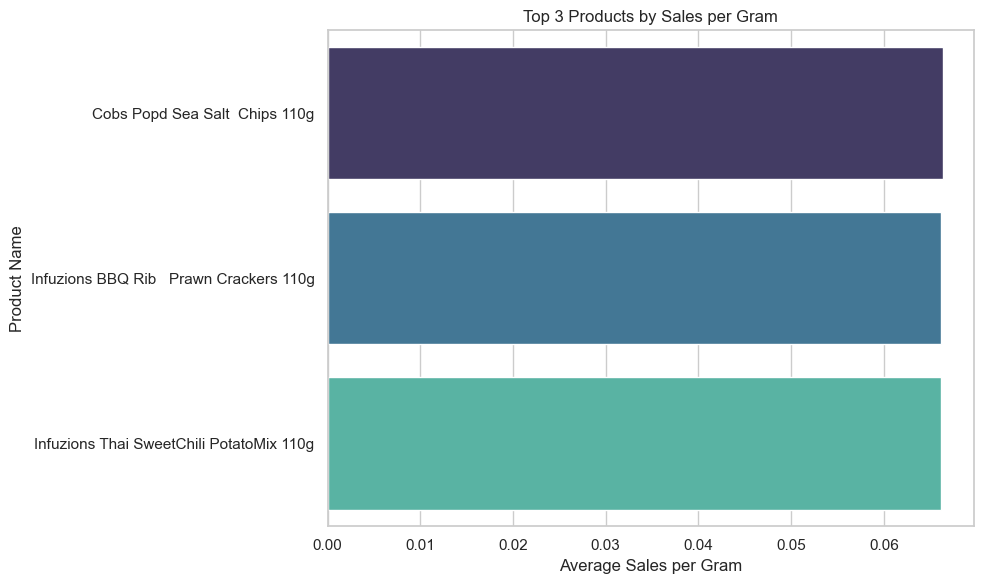

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 3 products based on the normalized metric
sns.barplot(
    data=top_normalized_products,
    x='Sales_per_Gram',
    y='PROD_NAME',
    palette="mako"
)
plt.title("Top 3 Products by Sales per Gram")
plt.xlabel("Average Sales per Gram")
plt.ylabel("Product Name")
plt.tight_layout()  # Adjust layout to ensure everything fits well
plt.show()


**In this section, we took a closer look at how product packaging sizes might be influencing our sales. We used regex to pull the weight information (like 170g or 380g) out of the product names and added this as a new column. Then, we calculated a "Sales per Gram" metric to compare products more fairly, regardless of their size. By grouping these figures, we identified the top 3 products that perform best on a per-gram basis. This extra analysis gives us a deeper insight into product performance by highlighting how different packaging sizes can impact overall sales.

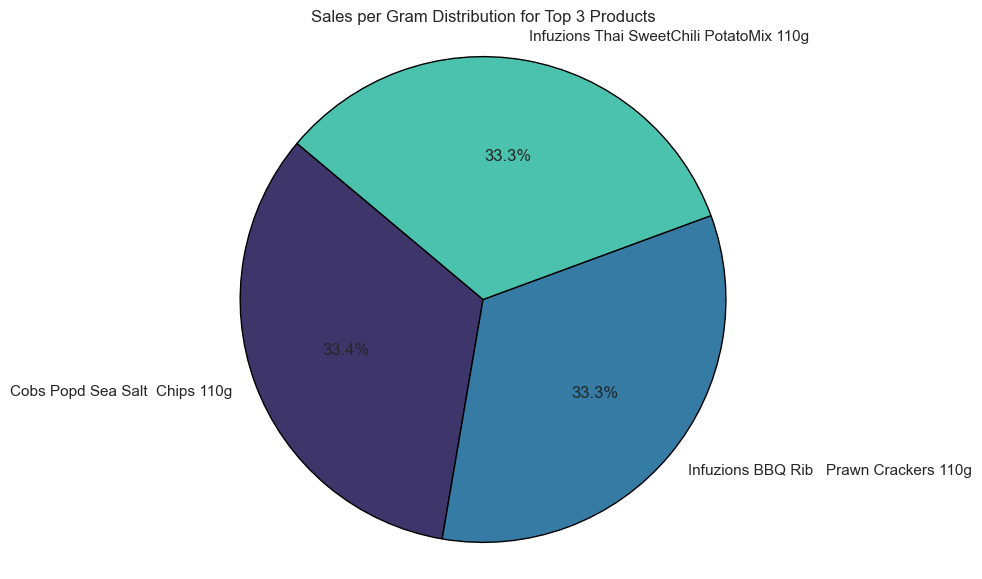

In [23]:
# Data for the pie chart
labels = top_normalized_products['PROD_NAME']
sizes = top_normalized_products['Sales_per_Gram']
colors = sns.color_palette('mako', len(labels))  # Using the same color palette

# Plotting the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Sales per Gram Distribution for Top 3 Products")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


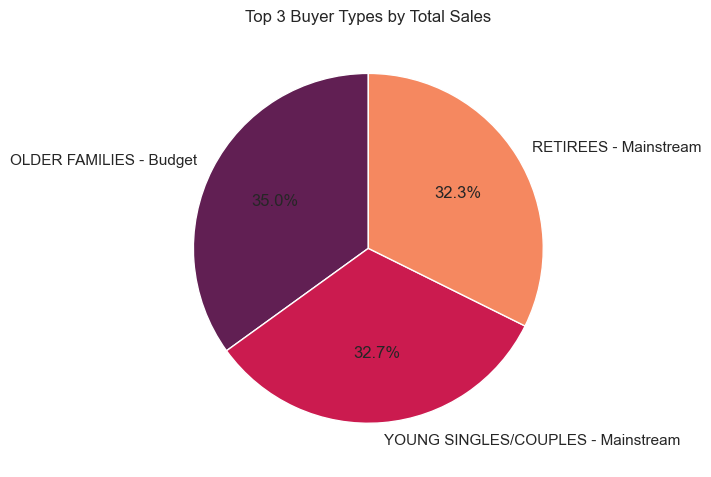

In [26]:
# Merging transaction data with customer data based on LYLTY_CARD_NBR
merged_data = pd.merge(transactions, purchase, on='LYLTY_CARD_NBR')

# Grouping by LIFESTAGE and PREMIUM_CUSTOMER to calculate total sales
buyer_sales_distribution = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# Combining LIFESTAGE and PREMIUM_CUSTOMER columns for labeling
buyer_sales_distribution['Buyer_Type'] = buyer_sales_distribution['LIFESTAGE'] + ' - ' + buyer_sales_distribution['PREMIUM_CUSTOMER']

# Sorting to get the top 3 buyer types by total sales
top_3_buyers = buyer_sales_distribution.sort_values(by='TOT_SALES', ascending=False).head(3)

# Data for the pie chart (Top 3 buyers)
labels = top_3_buyers['Buyer_Type']
sizes = top_3_buyers['TOT_SALES']
colors = sns.color_palette('rocket', len(labels))

# Plotting the pie chart for top 3 buyer types
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Top 3 Buyer Types by Total Sales')
plt.tight_layout()
plt.show()


**This pie chart displays the top 3 buyer segments that generate the highest sales, based on their LIFESTAGE and PREMIUM_CUSTOMER attributes. It highlights which types of customers (e.g., "Young Families - Premium") are driving the most revenue.

In [28]:
import scipy.stats as stats

# Merge transaction data with customer purchase behavior data
merged_data = pd.merge(transactions, purchase, on='LYLTY_CARD_NBR')

# Group data by LIFESTAGE and PREMIUM_CUSTOMER and calculate total sales for each group
buyer_sales_distribution = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

# For hypothesis testing using ANOVA, we create a list of total sales for each unique LIFESTAGE group.
# (We could also split by both LIFESTAGE and PREMIUM_CUSTOMER, but here we use LIFESTAGE for simplicity.)
buyer_groups = [merged_data[merged_data['LIFESTAGE'] == group]['TOT_SALES'] 
                for group in merged_data['LIFESTAGE'].unique()]

# Perform the ANOVA test
anova_result = stats.f_oneway(*buyer_groups)

# Display the ANOVA results.
print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Interpret the result based on a 0.05 significance level.
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in total sales between customer segments.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in total sales between customer segments.")


ANOVA Result:
F-statistic: 27.048242183118926
P-value: 1.984988046152062e-32
Reject the null hypothesis: There is a significant difference in total sales between customer segments.
